Paola Díaz Serrano

Procesamiento Inteligente de Datos

# Inicio: Descargar librerías y cargar el dataset
**Pandas** es una biblioteca diseñada para la manipulación, análisis y limpieza de datos tabulares (estructurados).

**Matplotlib** es la biblioteca estándar para la creación de gráficos en Python. Permite generar visualizaciones estáticas, animadas e interactivas.

**Seaborn** es una biblioteca de visualización basada en Matplotlib, pero más especializada en la creación de gráficos estadísticos.


In [1]:
import pandas as pd

import matplotlib.pyplot as plt

import seaborn as sns

Cargar el dataset y leer su información inicial

Con pdf.read podemos copiar la ruta para poder cargar nuestro dataset, con head de canvas sirve para visualizar las primeras filas de un dataset

In [2]:
df = pd.read_csv('/content/Cleaned_Students_Performance.csv')

df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,total_score,average_score
0,0,group B,bachelor's degree,1,0,72,72,74,218,72.666667
1,0,group C,some college,1,1,69,90,88,247,82.333333
2,0,group B,master's degree,1,0,90,95,93,278,92.666667
3,1,group A,associate's degree,0,0,47,57,44,148,49.333333
4,1,group C,some college,1,0,76,78,75,229,76.333333


## Explorando el dataset

In [3]:
# Verificar si hay valores nulos

print(df.isnull().sum())



# Obtener la información del dataset, nos da el num de columnas, entradas,etc

df.info()



# Resumen de estadísitcas
df.describe()

gender                         0
race_ethnicity                 0
parental_level_of_education    0
lunch                          0
test_preparation_course        0
math_score                     0
reading_score                  0
writing_score                  0
total_score                    0
average_score                  0
dtype: int64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   gender                       1000 non-null   int64  
 1   race_ethnicity               1000 non-null   object 
 2   parental_level_of_education  1000 non-null   object 
 3   lunch                        1000 non-null   int64  
 4   test_preparation_course      1000 non-null   int64  
 5   math_score                   1000 non-null   int64  
 6   reading_score                1000 non-null   int64  
 7   writing_score           

,gender,lunch,test_preparation_course,math_score,reading_score,writing_score,total_score,average_score
count,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000
mean,0.482000,0.645000,0.358000,66.08900,69.169000,68.054000,203.312000,67.770667
std,0.499926,0.478753,0.479652,15.16308,14.600192,15.195657,42.771978,14.257326
min,0.000000,0.000000,0.000000,0.00000,17.000000,10.000000,27.000000,9.000000
25%,0.000000,0.000000,0.000000,57.00000,59.000000,57.750000,175.000000,58.333333
50%,0.000000,1.000000,0.000000,66.00000,70.000000,69.000000,205.000000,68.333333
75%,1.000000,1.000000,1.000000,77.00000,79.000000,79.000000,233.000000,77.666667
max,1.000000,1.000000,1.000000,100.00000,100.000000,100.000000,300.000000,100.000000


### Distribución de puntuaciones de matemáticas por género¶
Diagrama de caja para visualizar cómo difieren los puntajes de matemáticas entre estudiantes varones y mujeres.

Se crean los ejes del diagrama, con un tamaño de 10 x 6 y al final mostramos el diagrama



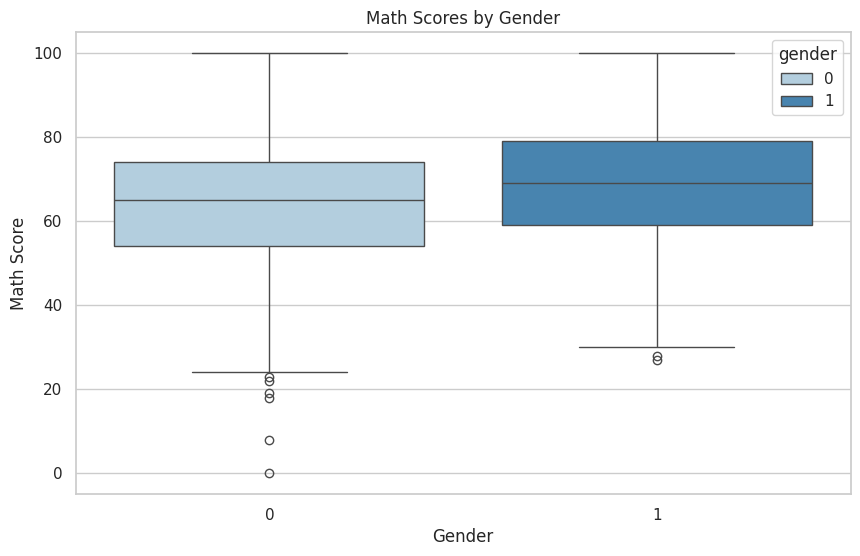

In [4]:
#Estilo de la gráfica es una grid blanca
sns.set(style = "whitegrid")


#Creamos el boxplot, es decir el diagrama de caja
plt.figure(figsize=(10, 6))

sns.boxplot(x='gender', y='math_score', data=df, palette="Blues", hue="gender")

plt.title('Math Scores by Gender')

plt.xlabel('Gender')

plt.ylabel('Math Score')

plt.show()

### Distribución de puntuaciones de lectura y escritura por género¶

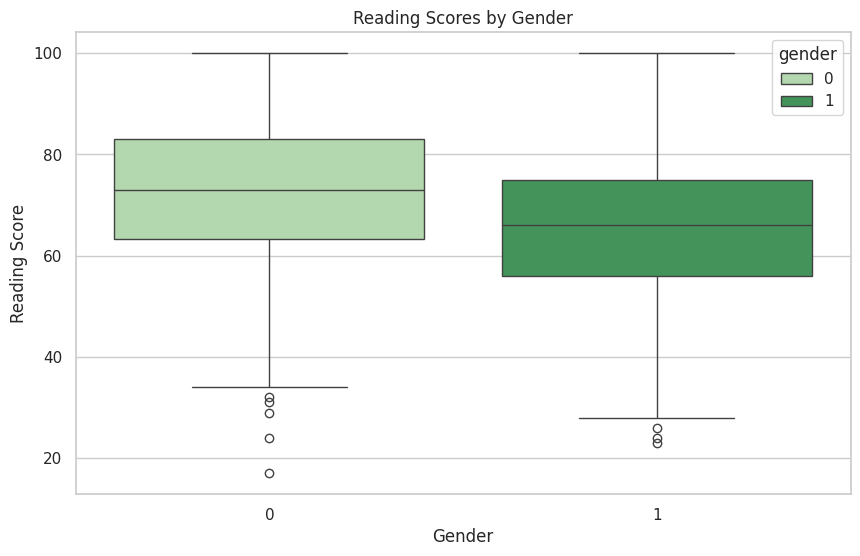

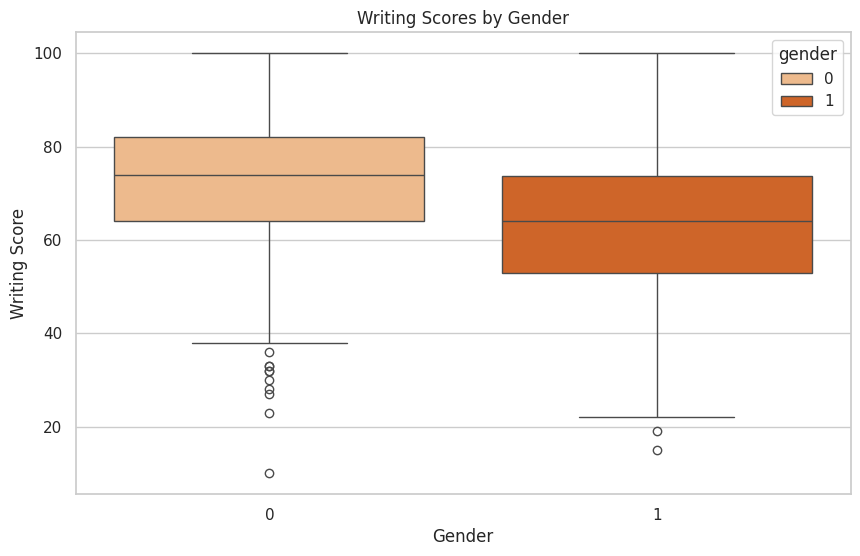

In [5]:
# Diagrama de caja para puntuaciones de lectura por género

plt.figure(figsize=(10, 6))

sns.boxplot(x='gender', y='reading_score', data=df, palette="Greens", hue="gender")

plt.title('Reading Scores by Gender')

plt.xlabel('Gender')

plt.ylabel('Reading Score')

plt.show()

# Diagrama de caja para puntuaciones de escritura por género

plt.figure(figsize=(10, 6))

sns.boxplot(x='gender', y='writing_score', data=df, palette="Oranges", hue="gender")

plt.title('Writing Scores by Gender')

plt.xlabel('Gender')

plt.ylabel('Writing Score')

plt.show()


### Puntajes promedio por nivel de educación de los padres¶

Análisis de cómo el nivel educativo de los padres afecta el desempeño de los estudiantes en todas las materias.

<ipython-input-6-22dfa393c136>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='parental_level_of_education', y='average_score', data=df, palette="coolwarm")


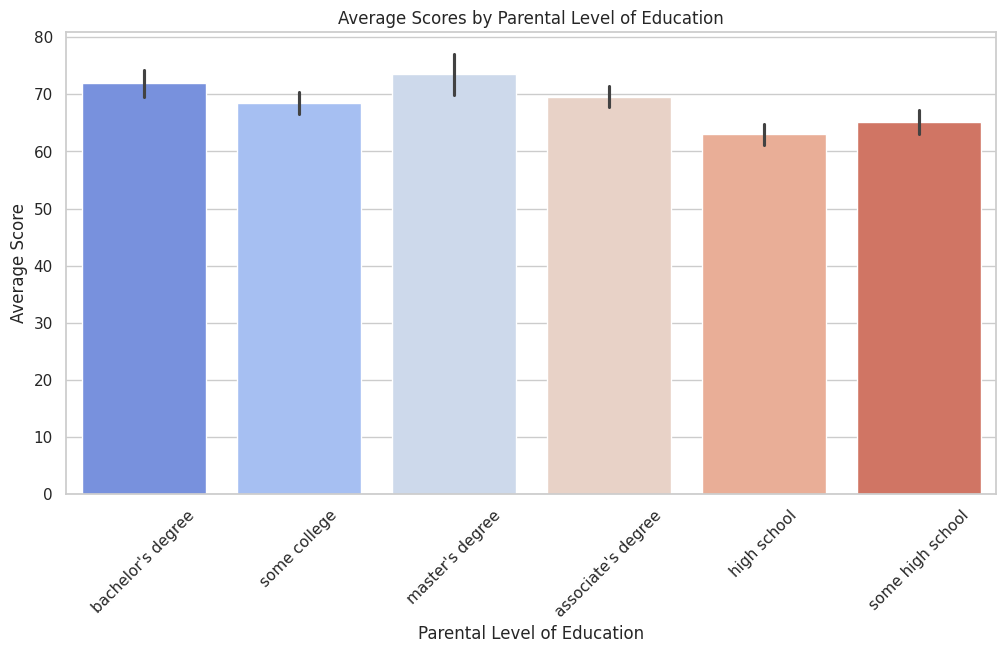

In [6]:
# Calcule el puntaje promedio en matemáticas, lectura y escritura para cada nivel educativo de los padres

df['average_score'] = df[['math_score', 'reading_score', 'writing_score']].mean(axis=1)



# Gráfico de barras de puntuaciones promedio por nivel de educación de los padres

plt.figure(figsize=(12, 6))

sns.barplot(x='parental_level_of_education', y='average_score', data=df, palette="coolwarm")

plt.title('Average Scores by Parental Level of Education')

plt.xlabel('Parental Level of Education')

plt.ylabel('Average Score')

plt.xticks(rotation=45)

plt.show()

### Impacto del almuerzo en el rendimiento¶
Veamos cómo el tipo de almuerzo (gratuito/reducido versus estándar) afecta el desempeño de los estudiantes.

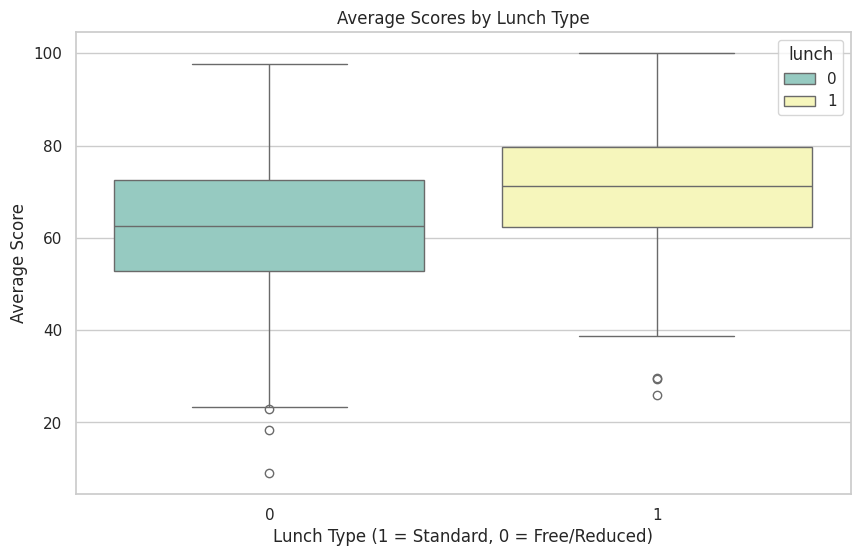

In [7]:
# Diagrama de caja para la puntuación promedio según el tipo de almuerzo (1 = almuerzo estándar, 0 = almuerzo gratis/reducido)
plt.figure(figsize=(10, 6))

sns.boxplot(x='lunch', y='average_score', data=df, palette="Set3", hue="lunch")

plt.title('Average Scores by Lunch Type')

plt.xlabel('Lunch Type (1 = Standard, 0 = Free/Reduced)')

plt.ylabel('Average Score')

plt.show()

### Impacto del curso de preparación de exámenes en el rendimiento¶
Análisis si completar un curso de preparación para exámenes tiene un impacto en el desempeño de los estudiantes.

Text(0, 0.5, 'Average Score')

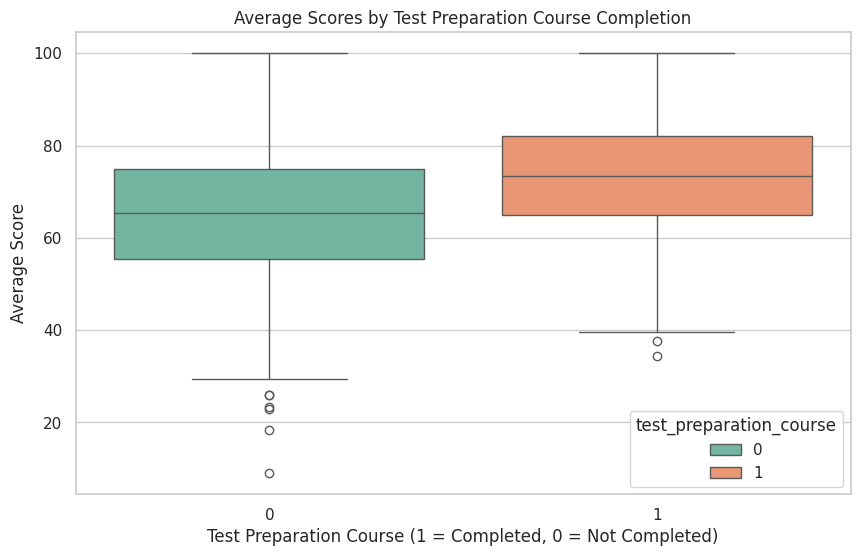

In [8]:
# Diagrama de caja para la puntuación promedio basada en la finalización del curso de preparación para el examen (1 = completado, 0 = no completado)
plt.figure(figsize=(10, 6))

sns.boxplot(x='test_preparation_course', y='average_score', data=df, palette="Set2", hue="test_preparation_course")

plt.title('Average Scores by Test Preparation Course Completion')

plt.xlabel('Test Preparation Course (1 = Completed, 0 = Not Completed)')

plt.ylabel('Average Score')


## Análisis de correlación¶
Podemos examinar la correlación entre las columnas relevantes:

                           gender     lunch  test_preparation_course  \
gender                   1.000000  0.021372                 0.006028   
lunch                    0.021372  1.000000                -0.017044   
test_preparation_course  0.006028 -0.017044                 1.000000   
math_score               0.167982  0.350877                 0.177702   
reading_score           -0.244313  0.229560                 0.241780   
writing_score           -0.301225  0.245769                 0.312946   
total_score             -0.130861  0.290064                 0.256710   
average_score           -0.130861  0.290064                 0.256710   

                         math_score  reading_score  writing_score  \
gender                     0.167982      -0.244313      -0.301225   
lunch                      0.350877       0.229560       0.245769   
test_preparation_course    0.177702       0.241780       0.312946   
math_score                 1.000000       0.817580       0.802642   
readin

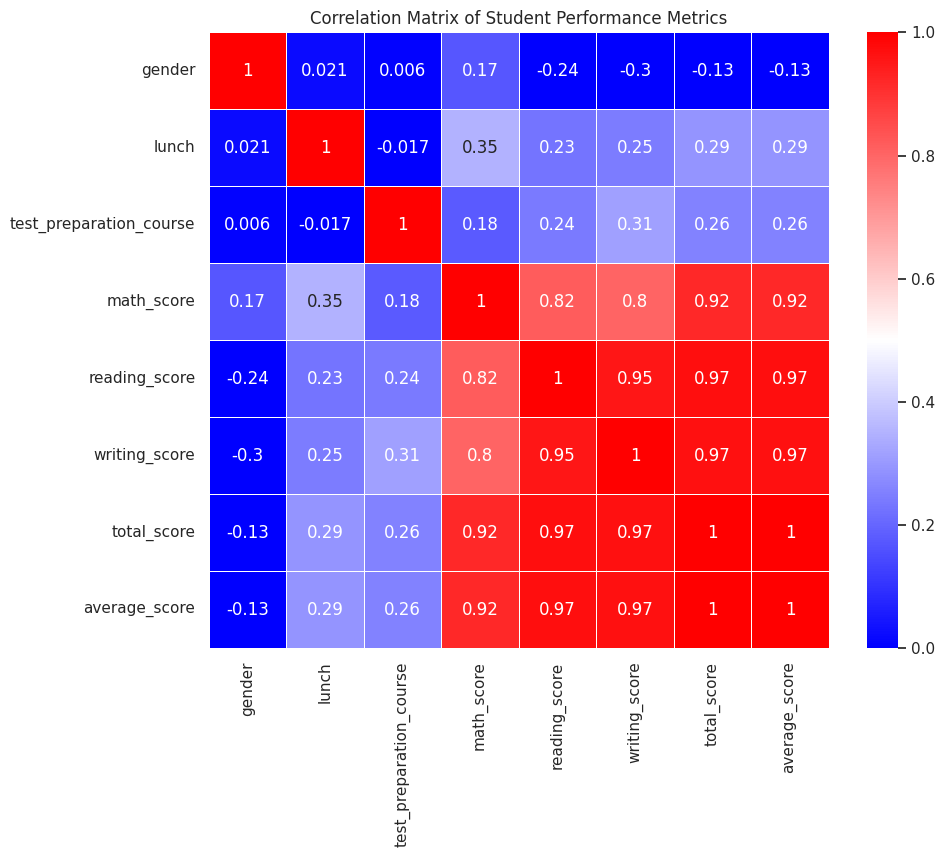

In [9]:
# Calculate correlation matrix for relevant columns

correlation_matrix = df[['gender', 'lunch', 'test_preparation_course', 'math_score', 'reading_score', 'writing_score', 'total_score', 'average_score']].corr()



# Display correlation matrix

print(correlation_matrix)



# Set up matplotlib figure for heatmap

plt.figure(figsize=(10, 8))



# Create heatmap using seaborn

sns.heatmap(correlation_matrix, annot=True, cmap='bwr', vmin=0, vmax=1, linewidths=0.5)



# Add title and show plot
plt.title('Correlation Matrix of Student Performance Metrics')

plt.show()

## Análisis estadístico¶
Prueba T: comparación de puntuaciones de matemáticas entre géneros
Para comparar estadísticamente las puntuaciones de matemáticas entre estudiantes varones y mujeres:

In [10]:
from scipy import stats



# Separate math scores by gender

male_math_scores = df[df['gender'] == 1]['math_score']

female_math_scores = df[df['gender'] == 0]['math_score']



# Perform independent t-test

t_statistic, p_value = stats.ttest_ind(male_math_scores, female_math_scores)



print(f"T-statistic: {t_statistic}, P-value: {p_value}")

T-statistic: 5.383245869828983, P-value: 9.120185549328822e-08


# SNS.BOXPLOT GRÁFICO DE CAJA
Un boxplot es una representación gráfica que muestra la distribución de un conjunto de datos numéricos. Se utiliza para identificar la mediana, la dispersión y los valores atípicos (outliers).

# SNS.HEATMAP MAPA DE CALOR
Un heatmap es una representación gráfica que muestra la magnitud de los valores en una matriz (o tabla) utilizando colores. Es útil para visualizar correlaciones entre variables, matrices de confusión, o cualquier conjunto de datos bidimensionales.